# Capstone - EDA And Modelling Part I
Date: 2021.11.16<br>

### Report Objectives

This report will combine the cleaned data from our four sources, Port Hardy Weather Ballon Station, Quillatyute Weather Ballon Station, Roundhouse Weather Station, and PowDay.com.  We will build a data frame with all values that we believe may be predictors, conduct EDA to understand which variables will be most useful, and build some simple models.

### Library and Data Imports

In [1]:
# data handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# managing timestamps
from datetime import datetime
from datetime import timedelta

# scipy.stats packages
from scipy.stats import chi2_contingency

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# import data
pow_day_df = pd.read_csv('./Data/PowDayHistoryClean.csv')
ph_df = pd.read_csv('./Data/PortHardyClean.csv')
q_df = pd.read_csv('./Data/QuillayuteClean.csv')
rh_df = pd.read_csv('./Data/RoundHouseClean.csv')

In [3]:
# confirm things imported correctly
display(pow_day_df.head(),
        ph_df.head(),
        q_df.head(),
        rh_df.head())

,time,lift,day_status
0,2014-12-31 00:00:00,Whistler Village Gondola,0
1,2014-12-31 00:00:00,Jersey Cream,0
2,2014-12-31 00:00:00,Crystal,0
3,2014-12-31 00:00:00,7th Heaven,0
4,2014-12-31 00:00:00,Glacier,0


,DATE,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT
0,2014-12-31 16:00:00,703.983333,3123.833333,-1.633333,-9.100000,57.666667,2.776667,335.000000,25.000000
1,2015-01-01 04:00:00,715.000000,2961.000000,-1.500000,-8.000000,61.500000,2.940000,336.000000,16.500000
2,2015-01-01 16:00:00,705.680000,3013.800000,-3.080000,-4.260000,91.800000,3.990000,287.600000,35.000000
3,2015-01-02 04:00:00,698.766667,3012.666667,-9.544444,-26.155556,46.444444,1.250000,267.222222,36.111111
4,2015-01-02 16:00:00,710.375000,2863.750000,-11.550000,-25.250000,36.750000,0.795000,324.000000,24.250000


,DATE,PRES,HGHT,TEMP,DWPT,RELH,MIXR,DRCT,SKNT
0,2014-12-31 16:00:00,701.500000,3139.000000,-1.200000,-10.200000,50.000000,2.525000,15.000000,19.000000
1,2015-01-01 04:00:00,694.366667,3186.777778,-0.822222,-12.644444,40.555556,2.111111,340.555556,12.888889
2,2015-01-01 16:00:00,690.750000,3206.750000,-2.100000,-10.175000,55.250000,2.615000,335.000000,16.250000
3,2015-01-02 04:00:00,702.800000,3038.000000,-2.320000,-7.220000,69.400000,3.186000,280.800000,35.600000
4,2015-01-02 16:00:00,717.975000,2808.250000,-4.225000,-41.975000,3.750000,0.147500,289.500000,39.250000


,Date/Time,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Snow on Grnd (cm)
0,2015-01-01,4.5,0.5,2.5,0.0,0,0.0,1,117.0
1,2015-01-02,-3.0,-6.0,-4.5,0.0,0,0.0,1,116.0
2,2015-01-03,-6.0,-9.0,-7.5,0.0,0,5.0,0,115.0
3,2015-01-04,0.0,-8.0,-4.0,0.0,0,33.0,0,132.0
4,2015-01-05,3.0,-5.0,-1.0,23.0,0,6.0,0,149.0


It looks like everything is in order.  Let's check the data types of our columns.

In [4]:
# check column info
display(pow_day_df.info(),
        ph_df.info(),
        q_df.info(),
        rh_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26264 entries, 0 to 26263
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        26264 non-null  object
 1   lift        26264 non-null  object
 2   day_status  26264 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 615.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    2295 non-null   object 
 1   PRES    2295 non-null   float64
 2   HGHT    2295 non-null   float64
 3   TEMP    2295 non-null   float64
 4   DWPT    2295 non-null   float64
 5   RELH    2295 non-null   float64
 6   MIXR    2295 non-null   float64
 7   DRCT    2295 non-null   float64
 8   SKNT    2295 non-null   float64
dtypes: float64(8), object(1)
memory usage: 161.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385

None

None

None

None

Everything looks good except for the date columns.  Let's change each of these to a datetime.

In [5]:
# change each df's data column to a datetime object
pow_day_df['time'] = pd.to_datetime(pow_day_df['time'])
ph_df['DATE'] = pd.to_datetime(ph_df['DATE'])
q_df['DATE'] = pd.to_datetime(q_df['DATE'])
rh_df['Date/Time'] = pd.to_datetime(rh_df['Date/Time'])

# confirm it has worked
display(pow_day_df['time'].dtypes,
        ph_df['DATE'].dtypes,
        q_df['DATE'].dtypes,
        rh_df['Date/Time'].dtypes)

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

dtype('<M8[ns]')

With all of our date/time columns now in datetime format, let's move onto buildling our final data frame layout with all the information we need.

### Data Wrangling

Here we are going to construct a data frame where reach row consists of a target, the lift status for that day, and all the variables we think may be important from the data sets above.  Specifically, we are going to include:
- Weather data from the past 5 days
- Chair status for the previous 5 days
- Weather for the current day
- Day of the week

We are including weather for the current day as a proxy for weather forcast for the current day.  We will try the model with these values as is at first.  We may need to build some 'noise' into this data for future iterations to try and mimic the uncertainty of weather forecasts.  We are including day of the week due to our experiences skiing WhistlerBlackcomb.  The intuition is that given fixed anticedent weather conditions, the likelihood of the alpine lifts being opened increases considerably on Saturdays after a large storm cycle.

To begin, we are also going to focus on the Peak chair only.  It has one of the lower opening rates of all the alpine lifts at 75.9%, its opening is not dependent on other lower-frequency opening chairs being in operation (ex. Symphony will never open if Harmony is not open first), and the goal of WhistlerBlackcomb is to have it open every day they can as opposed to the T-Bars or Franz's which may be closed due to lower guest numbers on the mountain.

To help facilitate exploring other chairs later, let's start by building the weather portion of the data frame first.  Chair specific information can be tacked on as needed for each chair later.  We will use the date/time from the pow_day_df as the reference point.

Let's start by building out the column names with prefixes based on source dataframe and suffixes denoting lags.  One thing to note here.  Because we have two observations for the ballon data each day at 4AM and 4PM, lag 0 for the ballon data will correspond to the data point at 4PM on the day we are predicting the lift status for.  We may revisit this later. 

In [6]:
# get an empty list of column names to build column names on
col_names = []

# list of lag values to attach to each column from ballon data
ballon_suffixes = []
for lag in range(0, 144, 12):
    ballon_suffixes.append(f"_L{lag}h")
    
# build column names from Port Hardy dataset
# loop through all columns
for col in ph_df.columns:
    
    # don't take the date column
    if col != 'DATE':
        
        # add each suffix to the column name
        for lag in ballon_suffixes:
            col_names.append(f"ph_{col}{lag}")

# build column names from Quillayute dataset
# loop through all columns
for col in q_df.columns:
    
    # don't take the date column
    if col != 'DATE':
        
        # add each suffix to the column name
        for lag in ballon_suffixes:
            col_names.append(f"q_{col}{lag}")

# build lag suffixes for powday and roundhouse data
pow_rh_suffixes = []
for lag in range(0,121, 24):
    pow_rh_suffixes.append(f"_L{lag}h")

# build column names for roundhouse data
for col in rh_df.columns:
    
    # don't take the date/time column
    if col != 'Date/Time':
        
        # add each suffix to the column name
        for lag in pow_rh_suffixes:
            col_names.append(f"rh_{col}{lag}")

# build column names for powday data
col = 'day_status'

# add each suffix to the column name
for lag in pow_rh_suffixes:
    col_names.append(f"pow_{col}{lag}")

# add a day of the week column
col_names.append('day_of_week')

# check to see it all has worked
col_names

['ph_PRES_L0h',
 'ph_PRES_L12h',
 'ph_PRES_L24h',
 'ph_PRES_L36h',
 'ph_PRES_L48h',
 'ph_PRES_L60h',
 'ph_PRES_L72h',
 'ph_PRES_L84h',
 'ph_PRES_L96h',
 'ph_PRES_L108h',
 'ph_PRES_L120h',
 'ph_PRES_L132h',
 'ph_HGHT_L0h',
 'ph_HGHT_L12h',
 'ph_HGHT_L24h',
 'ph_HGHT_L36h',
 'ph_HGHT_L48h',
 'ph_HGHT_L60h',
 'ph_HGHT_L72h',
 'ph_HGHT_L84h',
 'ph_HGHT_L96h',
 'ph_HGHT_L108h',
 'ph_HGHT_L120h',
 'ph_HGHT_L132h',
 'ph_TEMP_L0h',
 'ph_TEMP_L12h',
 'ph_TEMP_L24h',
 'ph_TEMP_L36h',
 'ph_TEMP_L48h',
 'ph_TEMP_L60h',
 'ph_TEMP_L72h',
 'ph_TEMP_L84h',
 'ph_TEMP_L96h',
 'ph_TEMP_L108h',
 'ph_TEMP_L120h',
 'ph_TEMP_L132h',
 'ph_DWPT_L0h',
 'ph_DWPT_L12h',
 'ph_DWPT_L24h',
 'ph_DWPT_L36h',
 'ph_DWPT_L48h',
 'ph_DWPT_L60h',
 'ph_DWPT_L72h',
 'ph_DWPT_L84h',
 'ph_DWPT_L96h',
 'ph_DWPT_L108h',
 'ph_DWPT_L120h',
 'ph_DWPT_L132h',
 'ph_RELH_L0h',
 'ph_RELH_L12h',
 'ph_RELH_L24h',
 'ph_RELH_L36h',
 'ph_RELH_L48h',
 'ph_RELH_L60h',
 'ph_RELH_L72h',
 'ph_RELH_L84h',
 'ph_RELH_L96h',
 'ph_RELH_L108h',
 'ph_R

With our column names defined, let's build our data frame.  We will use the unique days from powday as our index, and the column names to setup our columns.  We will fill the entire data frame with NaN values for now so it is easy to see where we are missing any data later.

In [7]:
# extract all unique dates from the date-time column
ref_dates = pow_day_df['time'].apply(lambda d: d.date()).unique()

# build data frame and fill with NaN values
model_template_df = pd.DataFrame(np.NaN, index = ref_dates, columns = col_names)

# check to see it worked
model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like that has worked well.  In this data frame, our target column is the lift status for the current day.  This is in column `pow_day_status_L0h`.  We will populate all of the weather data columns now and keep this as our template.  From there, we can inject the information from each lift one at a time.

In [8]:
# fill all Port Hardy trailing data points

# loop through all target dates
for target_date in model_template_df.index:

    # force target date time to match first expected record (4PM for the current day)
    target_date_with_time = datetime(target_date.year, target_date.month, target_date.day, 16)
    
    # loop to cycle through all of our lags
    for lag in range(0, 144, 12):

        # get record for correct lag period
        lag_record = ph_df[ph_df['DATE'].apply(lambda d: d + timedelta(hours = lag)) == target_date_with_time]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # loop to cycle through all columns in lag_recrods except Date/Time
            for col in lag_record.columns:
                
                # proceed if col is NOT date/time
                if col != 'DATE':
                    
                      # compose target column name from dataframe name, column extracted, and lag value
                    target_column_prefix = 'ph_'
                    target_column_suffix = f"_L{abs(lag)}h"
                    target_column = f"{target_column_prefix}{col}{target_column_suffix}"

                    # write the lag_record to the correct row in model_template
                    model_template_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [9]:
# check it has worked
model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above looks like it has worked well and we have successfully transposed out Port Hardy data set.  Let's repeat the above for the Quillayute data set and the PowDay data set.

In [ ]:
# fill all Quillayute trailing data points

# loop through all target dates
for target_date in model_template_df.index:

    # force target date time to match first expected record (4PM for the current day)
    target_date_with_time = datetime(target_date.year, target_date.month, target_date.day, 16)
    
    # loop to cycle through all of our lags
    for lag in range(0, 144, 12):

        # get record for correct lag period
        lag_record = q_df[q_df['DATE'].apply(lambda d: d + timedelta(hours = lag)) == target_date_with_time]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # loop to cycle through all columns in lag_recrods except Date/Time
            for col in lag_record.columns:
                
                # proceed if col is NOT date/time
                if col != 'DATE':
                    
                      # compose target column name from dataframe name, column extracted, and lag value
                    target_column_prefix = 'q_'
                    target_column_suffix = f"_L{abs(lag)}h"
                    target_column = f"{target_column_prefix}{col}{target_column_suffix}"

                    # write the lag_record to the correct row in model_template
                    model_template_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [ ]:
# check it has worked
cols = []

for col in model_template_df:
    if col.find('q_') != -1:
         cols.append(col)

model_template_df[cols]

Again, looks like tranposing our Quillayute data set has been successful.  Next up is the Roundhouse data set.

In [ ]:
# fill all Roundhouse trailing data points

# loop through all target dates
for target_date in model_template_df.index:
    
    # loop to cycle through all of our lags - must be in hours to match with column names
    for lag in range(0, 144, 24):

        # get record for correct lag period
        lag_record = rh_df[rh_df['Date/Time'].apply(lambda d: d.date() + timedelta(days = lag/24)) == target_date]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # loop to cycle through all columns in lag_recrods except Date/Time
            for col in lag_record.columns:
                
                # proceed if col is NOT date/time
                if col != 'Date/Time':
                    
                      # compose target column name from dataframe name, column extracted, and lag value
                    target_column_prefix = 'rh_'
                    target_column_suffix = f"_L{abs(lag)}h"
                    target_column = f"{target_column_prefix}{col}{target_column_suffix}"

                    # write the lag_record to the correct row in model_template
                    model_template_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [ ]:
# check it has worked
cols = []

for col in model_template_df:
    if col.find('rh_') != -1:
         cols.append(col)

model_template_df[cols]

With all of our weather data successfully transposed, the last thing to do is fill in the day of the week column based on the index.

In [14]:
day_of_week = []

for i in range(0, model_template_df.shape[0]):
    day_of_week.append(model_template_df.index[i].strftime('%a'))

model_template_df['day_of_week'] = day_of_week

model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,rh_Snow on Grnd (cm)_L72h,rh_Snow on Grnd (cm)_L96h,rh_Snow on Grnd (cm)_L120h,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thu
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fri
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sat
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,289.0,290.0,298.0,NaN,NaN,NaN,NaN,NaN,NaN,Thu
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,284.0,289.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,Fri
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,285.0,284.0,289.0,NaN,NaN,NaN,NaN,NaN,NaN,Sat
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,280.0,285.0,284.0,NaN,NaN,NaN,NaN,NaN,NaN,Sun


Now we are going to one-hot-encode the day of week column using pandas get dummies.  We are not going to drop one of the columns at this point.  We will run some tests later to determine which column we would like to drop. 

In [15]:
# one hot encode day of week and drop the first day
model_template_df = pd.get_dummies(model_template_df,
                                   columns = ['day_of_week'],
                                   drop_first = False)
# check it worked
model_template_df

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,1
2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,1,0,0
2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0,0,0,0,0
2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,1,0,0,0,0
2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,NaN,...,NaN,NaN,NaN,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,710.70,...,NaN,NaN,NaN,0,0,0,0,1,0,0
2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,707.85,...,NaN,NaN,NaN,1,0,0,0,0,0,0
2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,706.08,...,NaN,NaN,NaN,0,0,1,0,0,0,0
2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,708.90,...,NaN,NaN,NaN,0,0,0,1,0,0,0


The last thing we need to do before we move on is to transform all of the wind direction (DRCT) columns out of the current coordinate system.  Currently, they are logged as degrees from 0 to 360.  The issue with this is that while we understand 0 degerees and 360 degress to be the same direction, a machine learning model will see them as polar opposites (~~no~~ pun intended).  In order to solve this, we apply two transformations to the angle value resulting in two values representing the direction.  The formulas used are:
$$ \sin(2\pi\times\frac{\text{angle}}{360}) $$
$$ \cos(2\pi\times\frac{\text{angle}}{360}) $$

Each of these converts the angle to radians and then applies either a $\cos()$ or $\sin()$ funtion, resulting in a unique pairing of numbers.  This approach was taekn from [this post](https://mattgorb.github.io/wind) and subsequent references found on that website.

In [16]:
# list to store column names
drct_cols = []

# find all columns with DRCT in the column header
for col in model_template_df.columns:
    if col.find('DRCT') != -1:
        drct_cols.append(col)

# for each column in our subset
for col in drct_cols:
    
    # set the slice value dependent on the prefix length
    if col[0] == 'q':
        split = 2
    else:
        split = 3
    
    # compose sin column name
    sin_col = f"{col[:split]}sin_{col[split:]}"
    
    # calculate sin transform and store in a new column
    model_template_df[sin_col] = np.sin(model_template_df[col]/360*2*np.pi)
    
    # compose cos column name
    cos_col = f"{col[:split]}cos_{col[split:]}"
    
    # calculate cos transform and store in a new column
    model_template_df[cos_col] = np.cos(model_template_df[col]/360*2*np.pi)
    
    # delete the original column
    model_template_df.drop(columns = col, inplace = True)

In [17]:
# confirm the above worked

print("List of columns not dropped:")
for col in drct_cols:
    if col in model_template_df.columns:
        print(col)
print(end='\n\n')

new_cols = 0
print("List of new colums:")
for col in model_template_df.columns:
    if col.find('DRCT') != -1:
        print(col, end = ', ')
        new_cols += 1
print("Total new columns: ", new_cols)

List of columns not dropped:


List of new colums:
ph_sin_DRCT_L0h, ph_cos_DRCT_L0h, ph_sin_DRCT_L12h, ph_cos_DRCT_L12h, ph_sin_DRCT_L24h, ph_cos_DRCT_L24h, ph_sin_DRCT_L36h, ph_cos_DRCT_L36h, ph_sin_DRCT_L48h, ph_cos_DRCT_L48h, ph_sin_DRCT_L60h, ph_cos_DRCT_L60h, ph_sin_DRCT_L72h, ph_cos_DRCT_L72h, ph_sin_DRCT_L84h, ph_cos_DRCT_L84h, ph_sin_DRCT_L96h, ph_cos_DRCT_L96h, ph_sin_DRCT_L108h, ph_cos_DRCT_L108h, ph_sin_DRCT_L120h, ph_cos_DRCT_L120h, ph_sin_DRCT_L132h, ph_cos_DRCT_L132h, q_sin_DRCT_L0h, q_cos_DRCT_L0h, q_sin_DRCT_L12h, q_cos_DRCT_L12h, q_sin_DRCT_L24h, q_cos_DRCT_L24h, q_sin_DRCT_L36h, q_cos_DRCT_L36h, q_sin_DRCT_L48h, q_cos_DRCT_L48h, q_sin_DRCT_L60h, q_cos_DRCT_L60h, q_sin_DRCT_L72h, q_cos_DRCT_L72h, q_sin_DRCT_L84h, q_cos_DRCT_L84h, q_sin_DRCT_L96h, q_cos_DRCT_L96h, q_sin_DRCT_L108h, q_cos_DRCT_L108h, q_sin_DRCT_L120h, q_cos_DRCT_L120h, q_sin_DRCT_L132h, q_cos_DRCT_L132h, Total new columns:  48


In [18]:
# check values in those columns
model_template_df.iloc[:,-48:].describe().T

,count,mean,std,min,25%,50%,75%,max
ph_sin_DRCT_L0h,906.0,-0.395363,0.549511,-1.0,-0.868817,-0.531152,-0.057056,0.999990
ph_cos_DRCT_L0h,906.0,-0.319418,0.663715,-1.0,-0.924711,-0.533245,0.223533,0.996685
ph_sin_DRCT_L12h,913.0,-0.403660,0.551472,-1.0,-0.861629,-0.549509,-0.091502,1.000000
ph_cos_DRCT_L12h,913.0,-0.308545,0.662232,-1.0,-0.922201,-0.549509,0.216440,1.000000
ph_sin_DRCT_L24h,904.0,-0.397201,0.548069,-1.0,-0.869493,-0.534352,-0.058145,0.999990
ph_cos_DRCT_L24h,904.0,-0.319303,0.663865,-1.0,-0.924157,-0.533245,0.220697,0.996685
ph_sin_DRCT_L36h,911.0,-0.404228,0.550130,-1.0,-0.863836,-0.549509,-0.092226,1.000000
ph_cos_DRCT_L36h,911.0,-0.310084,0.662282,-1.0,-0.922762,-0.549509,0.209329,1.000000
ph_sin_DRCT_L48h,902.0,-0.398727,0.547422,-1.0,-0.873822,-0.532630,-0.059597,0.999990
ph_cos_DRCT_L48h,902.0,-0.322003,0.662177,-1.0,-0.926635,-0.533245,0.218569,0.996685


A visual scan of the above shows that we have created a sin and cos column for each direction column, removed the original direction column, and that the values in each of our new columns fall bewteen -1 and 1 as expected.  Now let's convert all of our wind speed columns for a unit of knots/hr to a unit of km/hr.

In [19]:
# change all wind speed columns to km/hr from knots per hour 1.852 conversion
for col in model_template_df.columns:
    if col.find('SKNT') != -1:
        model_template_df[col] = model_template_df[col].apply(lambda knots: knots*1.852)

We have now completed our model template.  The plan from here is to plug one chair of data into the PowDay columns, drop records containing NaN, and start getting a look at some correlations.

### EDA - Peak Chair

As mentioned, we will start with analyzing the Peak chair.  The first thing to do is to get the appropriate data into our template.

In [20]:
# create a copy
peak_df = model_template_df.copy(deep = True)

In [21]:
# fill all PowDay trailing data points

# loop through all target dates
for target_date in peak_df.index:
    
    # loop to cycle through all of our lags - must be in hours to match with column names
    for lag in range(0, 144, 24):

        # get record for correct lag period
        lag_record = pow_day_df[(pow_day_df['time'].apply(lambda d: d.date() + timedelta(days = lag/24)) == target_date) &
                                           (pow_day_df['lift'] == 'Peak')]
        
        # get the number of rows in the lag_record
        num_rows = lag_record.shape[0]
        
        # if we have more than one row in our lag record, assert an error
        if num_rows > 1:
            assert True, f'We have a duplicate lag record at indicies {lag_record.index}'
        
        # if we have exactly one row, proceed
        elif num_rows == 1:
            
            # extract the day_status column only
            col = 'day_status'
                
            # compose target column name from dataframe name, column extracted, and lag value
            target_column_prefix = 'pow_'
            target_column_suffix = f"_L{abs(lag)}h"
            target_column = f"{target_column_prefix}{col}{target_column_suffix}"

            # write the lag_record to the correct row in model_template
            peak_df.loc[target_date, target_column] = lag_record[col].values[0]

        # if the value is 0, do nothing and leave NaN values in our data frame
        else:
            pass     

In [22]:
# check it has worked
cols = []

for col in peak_df:
    if col.find('pow_') != -1:
         cols.append(col)

peak_df[cols]

,pow_day_status_L0h,pow_day_status_L24h,pow_day_status_L48h,pow_day_status_L72h,pow_day_status_L96h,pow_day_status_L120h
2014-12-31,0.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,1.0,0.0,NaN,NaN,NaN,NaN
2015-01-02,1.0,1.0,0.0,NaN,NaN,NaN
2015-01-03,1.0,1.0,1.0,0.0,NaN,NaN
2015-01-04,1.0,1.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...
2021-03-25,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-26,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-27,1.0,1.0,1.0,1.0,1.0,1.0
2021-03-28,0.0,1.0,1.0,1.0,1.0,1.0


Now we are going to move our date from the index to a column for easier comparisons moving forward.

In [23]:
# pull date out and then rename the column
peak_df.reset_index(inplace = True)
peak_df.rename(columns = {'index': 'Date'}, inplace = True)

# get into date time
peak_df['Date'] = pd.to_datetime(peak_df['Date'])

# check it has worked
peak_df

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
0,2014-12-31,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-03,700.360000,718.400000,710.375000,698.766667,705.680000,715.000000,703.983333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-04,706.300000,704.880000,700.360000,718.400000,710.375000,698.766667,705.680000,715.000,703.983333,...,-0.332893,0.942965,0.258819,0.965926,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,2021-03-25,707.066667,699.950000,690.300000,708.900000,706.333333,706.080000,705.933333,707.850,704.400000,...,-0.965926,0.258819,-0.996195,-0.087156,-0.984808,0.173648,-0.788011,0.615661,-0.959642,0.281225
934,2021-03-26,704.400000,703.475000,707.066667,699.950000,690.300000,708.900000,706.333333,706.080,705.933333,...,-0.412045,0.911164,-0.559193,0.829038,-0.965926,0.258819,-0.996195,-0.087156,-0.984808,0.173648
935,2021-03-27,713.533333,699.925000,704.400000,703.475000,707.066667,699.950000,690.300000,708.900,706.333333,...,-0.996195,0.087156,-0.573576,0.819152,-0.412045,0.911164,-0.559193,0.829038,-0.965926,0.258819
936,2021-03-28,703.733333,704.200000,713.533333,699.925000,704.400000,703.475000,707.066667,699.950,690.300000,...,-0.406737,0.913545,-0.495459,0.868632,-0.996195,0.087156,-0.573576,0.819152,-0.412045,0.911164


Let's now check how many of our records contain NaN values.  The plan for the first model pass through is going to be to simply drop them and see how our model does.

In [24]:
# total number of rows
rows = peak_df.shape[0]

# number of missing ros
missing_rows = rows - peak_df.dropna().shape[0]

print(f"Total rows: {rows}")
print(f"Missing rows: {missing_rows}")
print(f"Percent missing rows: {100*missing_rows/rows: .1f}%")

Total rows: 938
Missing rows: 268
Percent missing rows:  28.6%


That is a really high number of rows with missing data.  The issue here is that we are using each value from our weather data sets 6 times.  So any missing value in those data sets ends up giving us 6 rows with NaN values in our composite matrix.  There are two approaches to take from here.  First is to go backwards and come up with better imputation strategies to reduce the number of NaN values coming through.  The second is to drop the rows containing missing values and press forward.

We are going to take the second approach to allow us to get a baseline for our model.

In [25]:
# drop all rows with NaN values
peak_df = peak_df.dropna()

In [26]:
# check it worked
peak_df.isna().any(axis = 1).sum()

0

#### EDA - Snow Pack Depth

We are going to start by exploring the Total Snow on Ground feature.  Our expectations is that we will find some minimum value below which the Peak chair will never open.  Our hope is that the range of values over which this happens each season is relatively small.  In order to do this, we will look for the first day in each season that the Peak chair opens, and note the depth of the base in the days leading up to that day.  Once a chair lift has opened, in our expericence, it has never closed due to a lack of snow base.

In [27]:
# list of years we have data from season start for
season_years = [2016, 2017, 2018, 2019, 2020]

for season_year in season_years:
    
    if season_year == 2016:

        # search for the dates after November in a given year that have the lift open
        # and take the first one
        opening_days_df = peak_df[(peak_df['Date'].apply(lambda d: d.year) == season_year) &
                                  (peak_df['Date'] > datetime(season_year, 11, 1)) &
                                  (peak_df['pow_day_status_L0h'] == 1)].head(1)
    else:
        annual_open = peak_df[(peak_df['Date'].apply(lambda d: d.year) == season_year) &
                              (peak_df['Date'] > datetime(season_year, 11, 1)) &
                              (peak_df['pow_day_status_L0h'] == 1)].head(1)
        opening_days_df = opening_days_df.append(annual_open)
        
opening_days_df        

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
266,2016-11-30,701.180,697.075000,704.716667,696.250000,699.50,697.214286,692.725000,701.2500,703.700,...,-0.884988,0.465615,-0.236273,0.971687,-0.500000,-0.866025,0.562805,-0.826590,-0.906308,-0.422618
420,2017-12-02,704.900,701.100000,693.100000,702.728571,701.60,703.775000,708.666667,712.0000,708.100,...,-0.990268,0.139173,-0.999577,-0.029085,-0.723369,-0.690462,-0.997250,0.074108,-0.938694,-0.344752
566,2018-12-01,699.975,705.700000,692.028571,703.560000,706.52,701.566667,699.550000,702.3375,705.725,...,-0.763796,-0.645458,-0.642788,-0.766044,-0.566406,-0.824126,-0.707107,-0.707107,-0.573576,-0.819152
823,2020-12-05,712.850,717.933333,713.000000,706.000000,700.40,713.850000,704.675000,700.5000,702.940,...,0.642788,-0.766044,0.999932,-0.011635,-0.551937,0.833886,-0.876154,0.482032,-0.584250,-0.811574


From the above, it looks like in 2019/2020 the Peak chair did not open until after the New Year.  Let's see if we can pull that out.

In [28]:
# set our year
season_year = 2020

# find our first opening
annual_open = peak_df[(peak_df['Date'].apply(lambda d: d.year) == season_year) &
                              (peak_df['Date'] < datetime(season_year, 2, 1)) &
                              (peak_df['pow_day_status_L0h'] == 1)].head(1)
annual_open

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
753,2020-01-14,706.75,701.55,697.0,703.45,701.35,702.0,705.8,696.975,696.966667,...,-0.768842,0.639439,-0.652287,-0.757972,-0.997859,-0.065403,-0.78152,0.62388,-0.916363,0.400349


The Peak chair did not open until January 14th that season.  Hopefully that provides us some good information regarding snow cover.  Let's get that last record with the rest to see what the snow pack was doing in the days leading up to the first opening.

In [29]:
# add 2020 record to df
opening_days_df = opening_days_df.append(annual_open)

# confirm it worked
opening_days_df

,Date,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
266,2016-11-30,701.180,697.075000,704.716667,696.250000,699.50,697.214286,692.725000,701.2500,703.700000,...,-0.884988,0.465615,-0.236273,0.971687,-0.500000,-0.866025,0.562805,-0.826590,-0.906308,-0.422618
420,2017-12-02,704.900,701.100000,693.100000,702.728571,701.60,703.775000,708.666667,712.0000,708.100000,...,-0.990268,0.139173,-0.999577,-0.029085,-0.723369,-0.690462,-0.997250,0.074108,-0.938694,-0.344752
566,2018-12-01,699.975,705.700000,692.028571,703.560000,706.52,701.566667,699.550000,702.3375,705.725000,...,-0.763796,-0.645458,-0.642788,-0.766044,-0.566406,-0.824126,-0.707107,-0.707107,-0.573576,-0.819152
823,2020-12-05,712.850,717.933333,713.000000,706.000000,700.40,713.850000,704.675000,700.5000,702.940000,...,0.642788,-0.766044,0.999932,-0.011635,-0.551937,0.833886,-0.876154,0.482032,-0.584250,-0.811574
753,2020-01-14,706.750,701.550000,697.000000,703.450000,701.35,702.000000,705.800000,696.9750,696.966667,...,-0.768842,0.639439,-0.652287,-0.757972,-0.997859,-0.065403,-0.781520,0.623880,-0.916363,0.400349


In [ ]:
# get a list of Snow on Ground days
snow_base_cols = []

for col in opening_days_df.columns:
    if col.find('Snow on Grnd (cm)') != -1:
        snow_base_cols.append(col)
        
# filter opening days for these columns
opening_days_df = opening_days_df[snow_base_cols].sort_index()

In [ ]:
# setup global plotting features
plt.rcParams['font.size'] = '16'

/tmp/ipykernel_2619/3414976781.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Opening Day', '1 Day Ahead', '2 Days Ahead', '3 Days Ahead', '4 Days Ahead', '5 Days Ahead'])


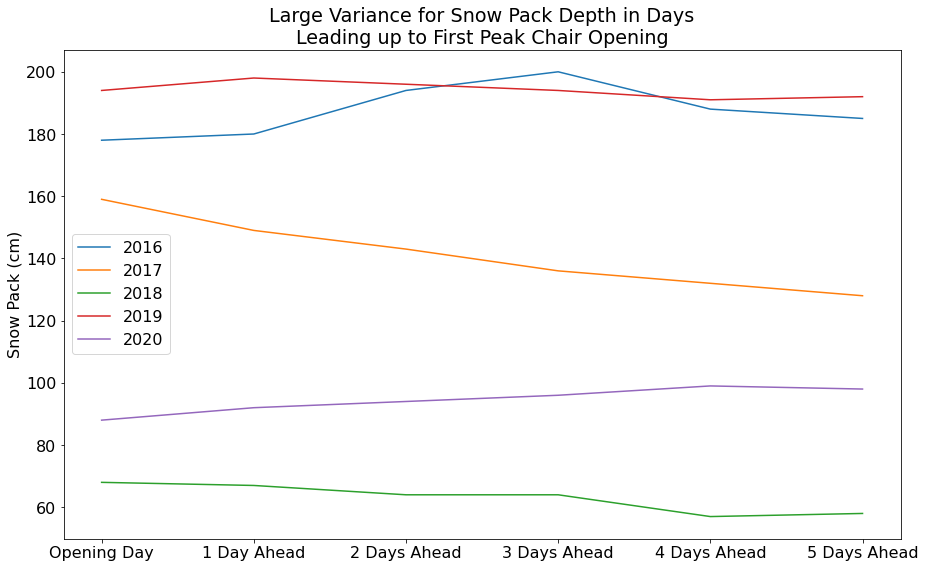

In [59]:
# plot the data
fig, ax = plt.subplots(figsize = (15,9))
plt.plot(opening_days_df.T, label = ['2016', '2017', '2018', '2019', '2020'])

plt.title('Large Variance for Snow Pack Depth in Days\nLeading up to First Peak Chair Opening')
#plt.xlabel('Hours of Lag')
ax.set_xticklabels(['Opening Day', '1 Day Ahead', '2 Days Ahead', '3 Days Ahead', '4 Days Ahead', '5 Days Ahead'])
plt.ylabel('Snow Pack (cm)')

plt.legend()

plt.savefig('SnowPackDepth.png', dpi=192)

plt.show()

So unfortunatley, our hypothesis was incorrect.  There is a huge variance in snow pack depth on the day the Peak chair first opened.  A possible explaination may be that the snow depth is measured at roughly 1640m, where as the Peak chair runs from roughly 1800m to 2200m.  If precipitation was falling, and the freezing level was between the weather station and the base of the lift, there could be far more snow at the lift eleveations than the weather station record shows.  We do have the rain fall for measurements at the weather station.  With this, and the rough guide that snow fall depth is roughly 10x rainfall depth, we may be able to construct a metric which better indicates snow fall at the Peak chair elevation.  We will put this on a list of items to try during feature engineering later.

Before we move on, let's take a look to see if there is an linear correlation of snowpack to lift status.

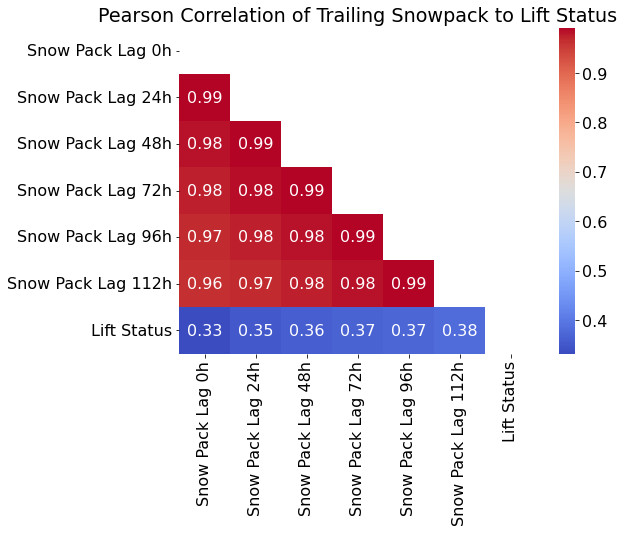

In [64]:
# check correlation of snow lags to target

# get snow pack cols
snowpack_cols = [col for col in peak_df.columns if col.find('Snow on Grnd') != -1]

# add target column
snowpack_cols.append('pow_day_status_L0h')

# get a dataFrame with only the columns we need
snowpack_df = peak_df[snowpack_cols]

# build labels for easier reading
labels = ['Snow Pack Lag 0h',
          'Snow Pack Lag 24h',
          'Snow Pack Lag 48h',
          'Snow Pack Lag 72h',
          'Snow Pack Lag 96h',
          'Snow Pack Lag 112h',
          'Lift Status']

# generate mask for upper triangle
mask = np.triu(np.ones_like(snowpack_df.corr(), dtype = bool))

# plot figure
plt.figure(figsize=(8,6))

# plot data and calculate correlation
sns.heatmap(snowpack_df.corr(),
            annot = True,
            cmap = 'coolwarm',
            mask = mask,
            xticklabels = labels,
            yticklabels = labels)

# add title
plt.title('Pearson Correlation of Trailing Snowpack to Lift Status')

plt.show()

The above correlation matrix shows that there is a weak linear correlation bewteen snow pack depth and lift status.  This makes sense, as our intuition is that snow pack depth will act a more of a switch.  Below a certain value, the Peak chair will never open, above a certain value, it is always open.

More importantly though, this matrix has reminded us that we have a high degree of co-linearity amoung the lag variables of snow pack.  This makes sense as the snow pack does not change greatly from one day to the next.  We will leave this for now, but we will drop all the snow pack lags from the model during feature engineering to see if that can improve over our baseline model.

#### EDA - Day of Wind Speed

Next on the list is the wind speed on any given day.  The assumption here is that there is some wind speed above which it is unsafe to open a chair lift.  Since we only have wind speeds for 4AM and 4PM, let's start by taking a look at both of them.

In [ ]:
# get the min and max wind speeds monring and night from both stations
min_max_wind_speeds = peak_df[['ph_SKNT_L0h', 'ph_SKNT_L12h', 'q_SKNT_L0h', 'q_SKNT_L12h']].agg(['min', 'max']).T

# round min speeds down
min_max_wind_speeds['min'] = min_max_wind_speeds['min'].apply(lambda n: int(n))

# round max speeds up
min_max_wind_speeds['max'] = np.ceil(min_max_wind_speeds['max'])

# check it worked
min_max_wind_speeds

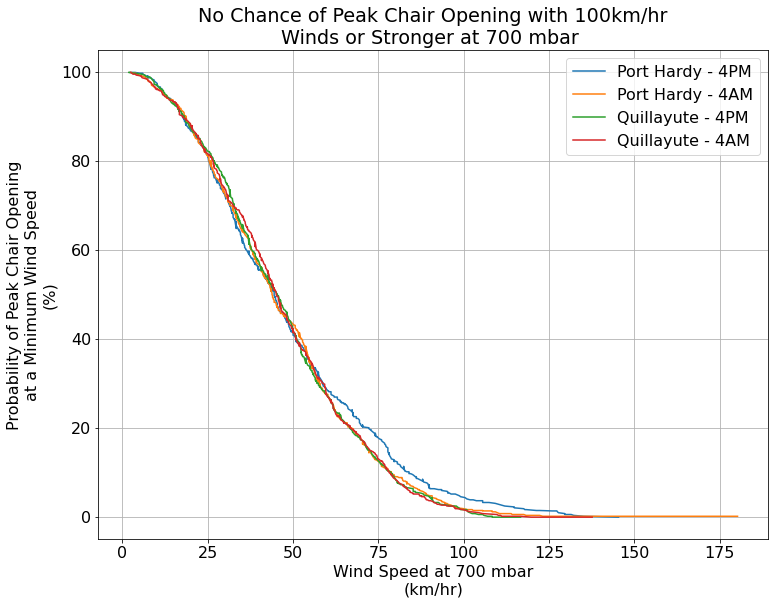

In [60]:
%%capture --no-display

# label dictionary
labels = {'ph_SKNT_L0h': 'Port Hardy - 4PM',
          'ph_SKNT_L12h': 'Port Hardy - 4AM',
          'q_SKNT_L0h': 'Quillayute - 4PM',
          'q_SKNT_L12h': 'Quillayute - 4AM'}

# create figure
plt.figure(figsize=(12,9))

# loop through colulmns to plot
for col in ['ph_SKNT_L0h', 'ph_SKNT_L12h', 'q_SKNT_L0h', 'q_SKNT_L12h']:
    
    # get just the columns we need into a smaller df
    tmp_df = peak_df[[col, 'pow_day_status_L0h']]

    # sort the values in descending order so cumulative sum gives highest percentage of openings to the lowest wind speed
    tmp_df.sort_values(col, ascending = False, inplace = True)

    # calculate the cumulative % of lift openings for each wind speed
    tmp_df['Percent_Lift_Openings'] = round(tmp_df['pow_day_status_L0h'].cumsum()/tmp_df['pow_day_status_L0h'].sum()*100, 1)

    # resort from smallest to largest wind speed for interpretability on graph
    tmp_df.sort_values(col, ascending = True, inplace = True)

    # plot data
    plt.plot(tmp_df[col],
             tmp_df['Percent_Lift_Openings'],
             label = labels[col])

# add title, labels, etc
plt.title('No Chance of Peak Chair Opening with 100km/hr\nWinds or Stronger at 700 mbar ')
plt.xlabel('Wind Speed at 700 mbar\n(km/hr)')
plt.ylabel('Probability of Peak Chair Opening\nat a Minimum Wind Speed\n(%)')

# turn on features and show plot
plt.grid()
plt.legend()
plt.show()

From the above, we can see there is a minimal difference in how the wind speed affects chair opening probability across morning/evening measurements and across weather station locations.  Once all other variables are controlled for, when the winds at 700 mbar reach 100km/hr, the probability of the chair opening falls to almost 0.  It is also worth noting that a wind speed of approximatley 45 km/hr is enough to drop the chance of the peak chair opening to only 50% when all other conditions for opening are met.

#### EDA - Port Hardy vs. Quillayute Data Correlation

As we can see from the above, it appears that the effect of the wind speeds from our two weather ballon stations at Port Hardy and Quillayute are highly correlated.  One of our current issues is we ended up with almost __ % of our data being excluded because of missing values from the two weather ballon data sets.  We are going to explore the correlation of each feature across the two data sets to see if we can amalgamate them into one upper air data set with far fewer missing values.

In [ ]:
# move the date columns to the index
ph_date_indexed_df = ph_df.set_index('DATE')
q_date_indext_df = q_df.set_index('DATE')

In [ ]:
# check correlation across two ballon sites
ph_date_indexed_df.corrwith(q_date_indext_df)

The above shows middling through strong correlations.  It is not the resounding answer we would have liked.  We will take a more robust approach by plotting the correlations of each column, and ensure that we are syncronizing the dates being compared.  From the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) it looks like the dates would have been synced for the above correlation, but we are not completely convinced.

In [37]:
# join two data frames together on the index
balloon_df = ph_date_indexed_df.join(q_date_indext_df,
                                    how = 'outer',
                                    lsuffix = '_ph',
                                    rsuffix = '_q')

# calculate the pearson correlation
pearson_r = balloon_df.corr()

# array to store pearson_r values
pearson_r_scores = []

# loop to pull out correlations on the diagonal of the Port Hardy vs. Quillayute section
for i in range(0, 8):
    pearson_r_scores.append(pearson_r.iloc[0:8, 8:].iloc[i, i])

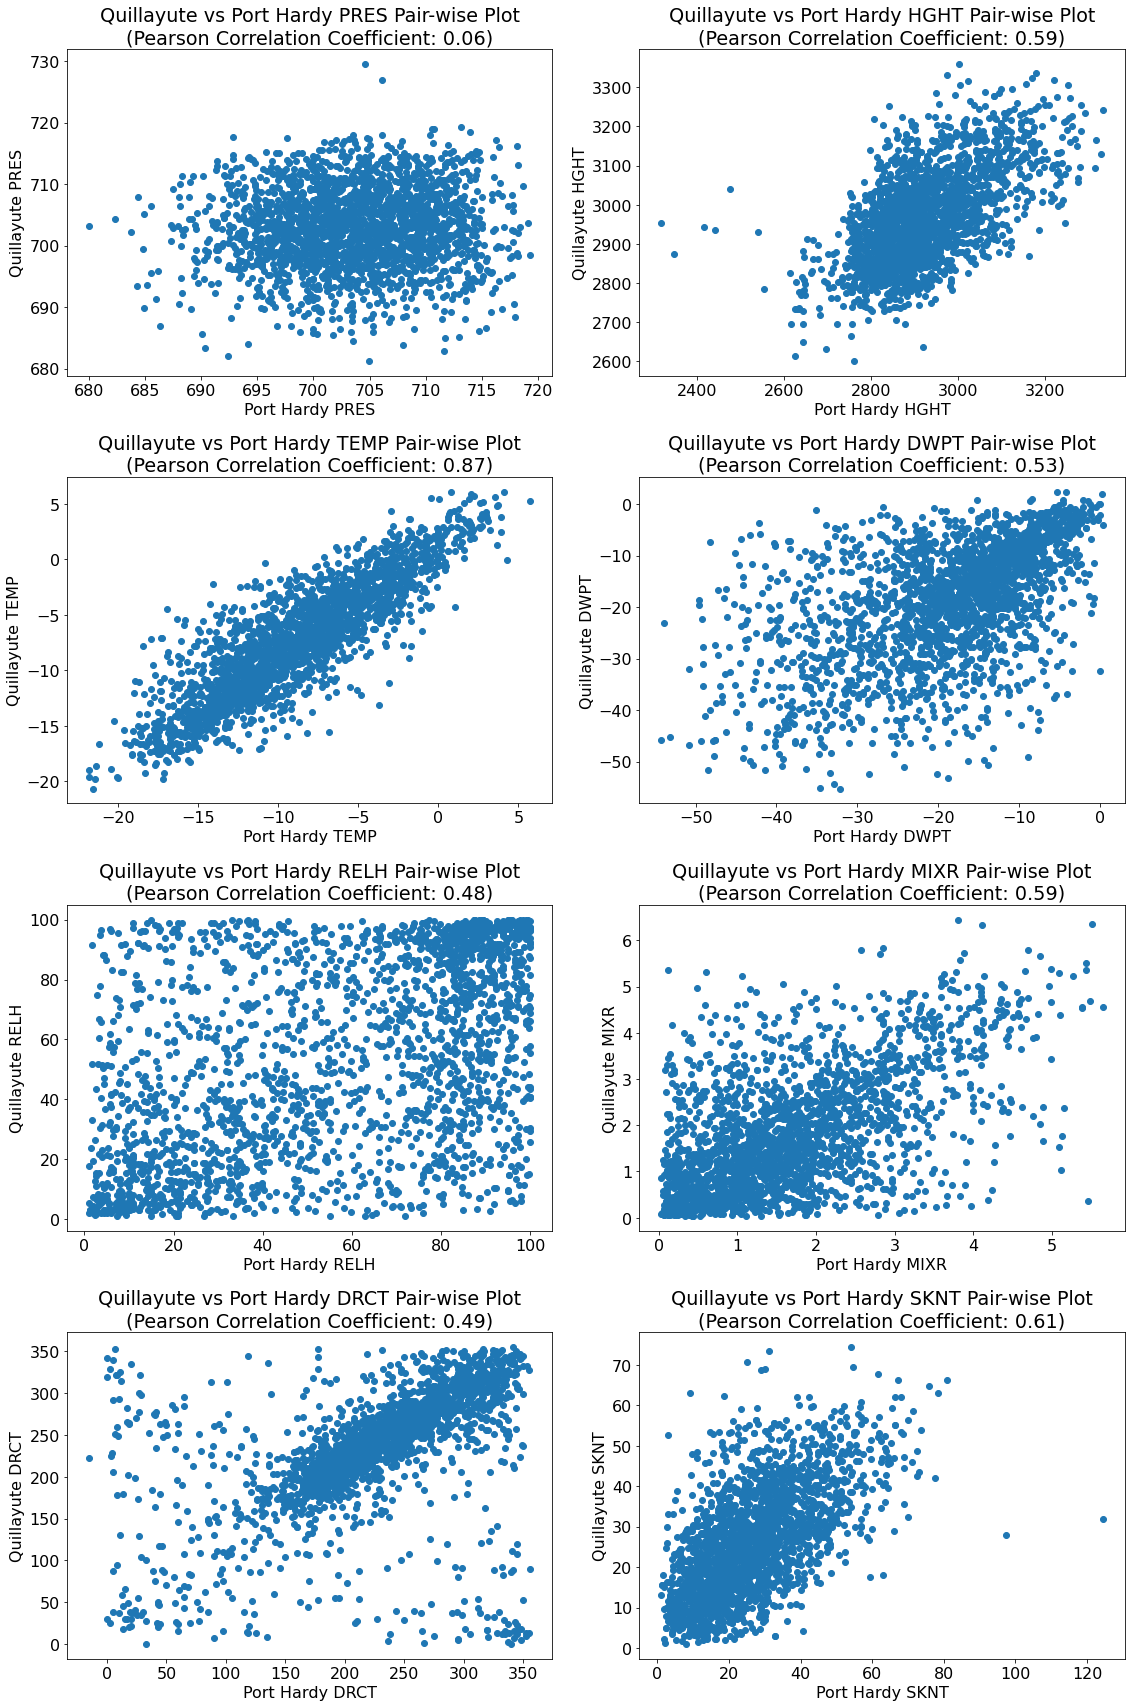

In [38]:
# build figure
rows = 4
columns = 2
fig, axes = plt.subplots(rows, columns,
                         figsize = (8*columns,6*rows))

# unravel axis into flat array for easier looping
flat_axes = axes.ravel()

# loop through each column name in one of the indexed data frames
for ax, col, pearson_r in zip(flat_axes, ph_date_indexed_df.columns, pearson_r_scores):

    # add suffix's to column name
    ph_col = f"{col}_ph"
    q_col = f"{col}_q"

    # plot data in a pair-wise fashion
    ax.scatter(balloon_df[ph_col],
               balloon_df[q_col],)
    
    # add titles, etc
    ax.set_title(f"Quillayute vs Port Hardy {col} Pair-wise Plot\n(Pearson Correlation Coefficient: {pearson_r:.2f})")
    ax.set(xlabel = f"Port Hardy {col}",
           ylabel = f"Quillayute {col}")

# tighten up layout and show
plt.tight_layout()
plt.show()

Scanning the pair-wise plots above, it looks like the correlations calculated previously were in fact accurate.  Our strongest correlation is clearly with temperature, while our weakest correlation is with pressure.  One interesting thing to note, since we are working with the original flight data, the direction variable is still in one column and in degrees.  There are a few clusters around the (0, 360) and (360, 0) points on the DRCT plot (bottom left).  These appear as outliers because we are treating 0 and 360 as polar opposites here.  This is a good visual confirmation that our decision to transform the direction into a two column coordinate system was the correct one.

Knowing that our direction correlation is only going to improve once it is translated to a different coordinate system, and that pressure is not going to be included as a featu we feel comfortable using one balloon data set to impute the missing values from another.  Again, we will set this aside and tackle it back in our BallonDataCleaning notebook.

#### EDA - Wind Direction

One of variables we feel might have a moderate influence on a lift's ability to open is the wind direction.  Let's visualize the correlation of wind direction on the morning of the lift operations to the lift being opened or closed that day to see if there are any patterns here.

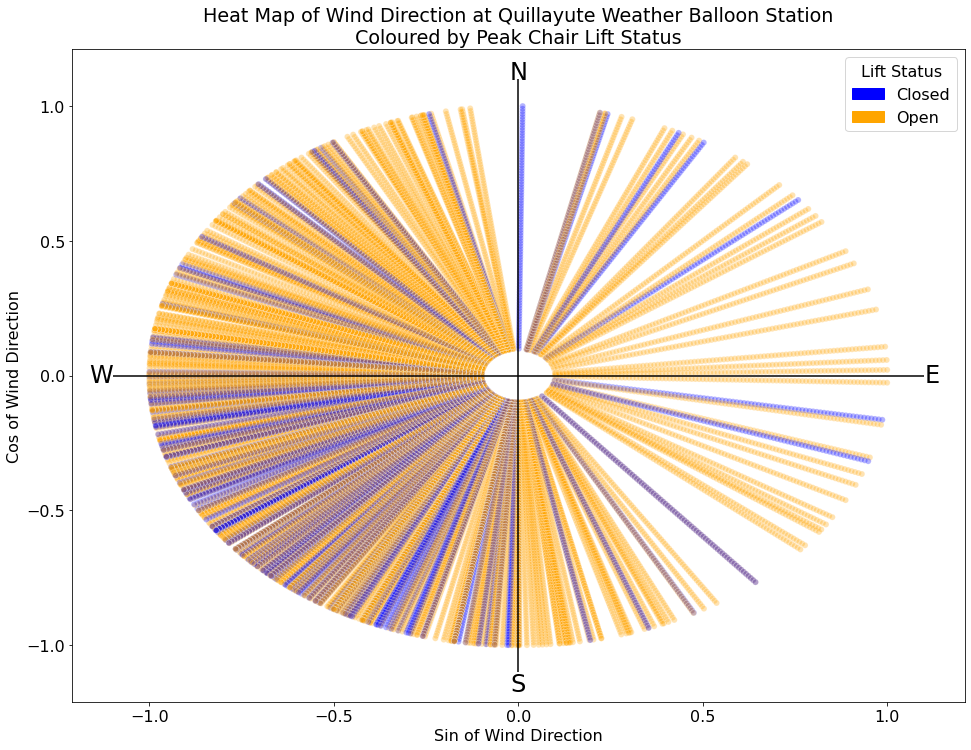

In [39]:
%%capture --no-display

# setup basic wind direction df to be overwritten each iteration
wind_direction_df = peak_df[['q_sin_DRCT_L12h', 'q_cos_DRCT_L12h', 'pow_day_status_L0h']]

# setup figure
plt.figure(figsize = (16,12))

# loop over each 'radius'
for i in np.arange(0.1, 1.01, 0.01):
    
    # scale the sin and cos coordinates to be a fractioon 'i' of 1
    wind_direction_df['q_sin_DRCT_L12h'] = peak_df['q_sin_DRCT_L12h']*i
    wind_direction_df['q_cos_DRCT_L12h'] = peak_df['q_cos_DRCT_L12h']*i
    wind_direction_df['pow_day_status_L0h'] = peak_df['pow_day_status_L0h']
    
    # use scatter plot to plot the wind direction angle at the given radius i.
    # doing this over successive values of i produces a ray-like effect
    sns.scatterplot(data = wind_direction_df,
                    x = 'q_sin_DRCT_L12h',
                    y = 'q_cos_DRCT_L12h',
                    hue = 'pow_day_status_L0h',
                    palette = ['blue', 'orange'],
                    alpha = 0.3)

# build custom legend
blue_patch = mpatches.Patch(color = 'blue', label = 'Closed')
orange_patch = mpatches.Patch(color = 'orange', label = 'Open')
plt.legend(title = 'Lift Status',
           handles = [blue_patch, orange_patch])

# add compass rose
plt.vlines(0, -1.1, 1.1, colors = 'black')
plt.hlines(0, -1.1, 1.1, colors = 'black')

# add cardinal directions
plt.text(0, 1.1, 'N', horizontalalignment = 'center', fontsize = 24)
plt.text(1.1, 0, 'E', verticalalignment = 'center', fontsize = 24)
plt.text(0, -1.1, 'S', horizontalalignment = 'center', verticalalignment = 'top', fontsize = 24)
plt.text(-1.1, 0, 'W', verticalalignment = 'center', horizontalalignment = 'right', fontsize = 24)

# add title and labels
plt.title('Heat Map of Wind Direction at Quillayute Weather Balloon Station\nColoured by Peak Chair Lift Status')
plt.xlabel('Sin of Wind Direction')
plt.ylabel('Cos of Wind Direction')

plt.show()

The above plot highlights several interesting pieces of information.  First, the winds at Quillayute predominently come from west of north, west, and west of south.  Winds rarely blow from the east.  This makes sense as Quillayute is on the western edge of a continent, boardering an ocean.  Second, it looks like winds coming from between west and south correlate the most strongly with the lifts being closed, where as winds coming from bewteen west and north have fewer closed days associated with them.  While the above is only qualitative evidence, we feel the apparent trend is strong enough to keep wind direction as a feature.

#### EDA - Snow Fall

Next, let's take a look at the snow fall day of and in the previous days to see how strongly correlated it is to the Peak chair opening.

In [40]:
# list to store snow fall column names plus targer
snow_fall_cols = []

# loop through columns
for col in peak_df.columns:
    
    # pull out the snow fall column
    if col.find('Total Snow (cm)') != -1:
        snow_fall_cols.append(col)

# append target column name to list of columns
snow_fall_cols.append('pow_day_status_L0h')
        
# check it worked
snow_fall_cols

['rh_Total Snow (cm)_L0h',
 'rh_Total Snow (cm)_L24h',
 'rh_Total Snow (cm)_L48h',
 'rh_Total Snow (cm)_L72h',
 'rh_Total Snow (cm)_L96h',
 'rh_Total Snow (cm)_L120h',
 'pow_day_status_L0h']

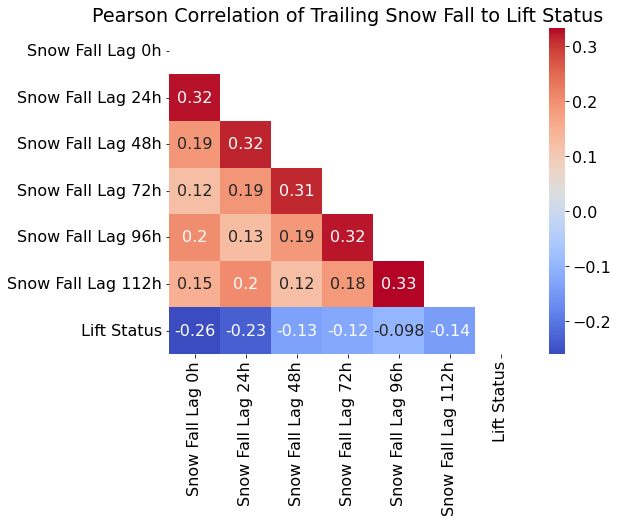

In [41]:
# get only the columns we need
snow_fall_df = peak_df[snow_fall_cols]

# build labels for easier reading
labels = ['Snow Fall Lag 0h',
          'Snow Fall Lag 24h',
          'Snow Fall Lag 48h',
          'Snow Fall Lag 72h',
          'Snow Fall Lag 96h',
          'Snow Fall Lag 112h',
          'Lift Status']

# generate mask for upper triangle
mask = np.triu(np.ones_like(snow_fall_df.corr(), dtype = bool))

# plot figure
plt.figure(figsize=(8,6))

# plot data and calculate correlation
sns.heatmap(snow_fall_df.corr(),
            annot = True,
            cmap = 'coolwarm',
            mask = mask,
            xticklabels = labels,
            yticklabels = labels)

# add title
plt.title('Pearson Correlation of Trailing Snow Fall to Lift Status')

plt.show()

While the above correlations may look overall weak there are a couple important things to note.  First, snow fall is negatively correlated with lift openings, which is to be expected.  Snow fall correlates with increased avalanche danger, which corresponds with increased work for ski patrol clearing dangerous slopes before the Peak chair can open.  Second, it is worth noting that snow fall day of lift operation and snowfall the day before have almost identical correlations.  Two to five days prior are also all much equivalent to themselves, and as a group, roughly half as important as day of and one day prior snow fall.

#### EDA - Day of Week

Let's take the same approach as above to look into how the day of the week correlates with opening status.

In [42]:
# list to store snow fall column names plus targert
day_cols = []

# loop through columns
for col in peak_df.columns:
    
    # pull out the day of week column
    if col.find('day_of_week') != -1:
        day_cols.append(col)

# append target column name to list of columns
day_cols.append('pow_day_status_L0h')
        
# check it worked
day_cols

['day_of_week_Fri',
 'day_of_week_Mon',
 'day_of_week_Sat',
 'day_of_week_Sun',
 'day_of_week_Thu',
 'day_of_week_Tue',
 'day_of_week_Wed',
 'pow_day_status_L0h']

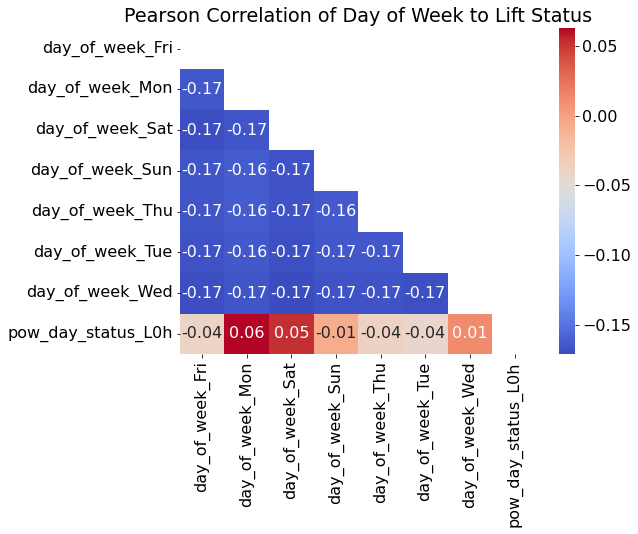

In [43]:
# get only the columns we need
day_of_week_df = peak_df[day_cols]

# generate mask for upper triangle
mask = np.triu(np.ones_like(day_of_week_df.corr(), dtype = bool))

# plot figure
plt.figure(figsize=(8,6))

# plot data and calculate correlation
sns.heatmap(day_of_week_df.corr(),
            annot = True,
            fmt = ".2f",
            cmap = 'coolwarm',
            mask = mask)

# add title
plt.title('Pearson Correlation of Day of Week to Lift Status')

plt.show()

It looks like all of the correlations bewteen day of the week and lift status are very weak.  Intuitively though, we feel they are significant.  Anyone who has skied Whistler/Blackcomb regularly knows that once it has snowed, their is a higher probability of the Peak chair opening if it is a Saturday than if it is a Wednesday.

Let's wrangle the data into a contingency table and pass it through a Chi Squared Test.  Formally our hypothesis are:
$$ H_0: \text{There is no relationship between day of week and lift status} $$
$$ H_A: \text{There is a realationship bewteen day of week and lift status} $$

We will use a typical p-value of 0.05 for our threashold of significance.

In [44]:
# utilize day_of_week df from above and manipulate into confusion matrix
display(day_of_week_df.groupby('pow_day_status_L0h').sum())

# store it
contingency_df = day_of_week_df.groupby('pow_day_status_L0h').sum()

,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
pow_day_status_L0h,,,,,,,
0.0,26,15,17,22,25,26,21
1.0,71,78,81,72,69,70,77


In [45]:
# run chi squared test
chi2_contingency(contingency_df)

(6.80376042726749,
 0.3393773400844624,
 6,
 array([[22.00597015, 21.09850746, 22.23283582, 21.32537313, 21.32537313,
         21.77910448, 22.23283582],
        [74.99402985, 71.90149254, 75.76716418, 72.67462687, 72.67462687,
         74.22089552, 75.76716418]]))

The above result returns a p-value of 0.34, firmly showing we cannot reject the null hypothesis and implying there is no relationship between the day of the week and the Peak chair lift status. This is not what we expected!  The next instinct is to see if there is any difference between the weekend and the weekday.  Looking at the pearson correlation matrix above, this may not produce the results we want, as Monday is the most strongly correlated with the lift being opened, and Sunday has a correlation of effectively 0.  Let's build the contingency table and check just in case.  We will use the same formal hypothesis as above, but we are expecting a large p-value again.

In [46]:
%%capture --no-display

# get a weekend column
day_of_week_df['is_weekend'] = np.where((day_of_week_df['day_of_week_Sat'] == 1) | (day_of_week_df['day_of_week_Sun'] == 1), 1, 0)

# get a weekday column
day_of_week_df['is_weekday'] = np.where((day_of_week_df['day_of_week_Sat'] != 1) & (day_of_week_df['day_of_week_Sun'] != 1), 1, 0)

In [47]:
# build contingency table
contingency_df = day_of_week_df.groupby('pow_day_status_L0h')[['is_weekend', 'is_weekday']].sum()

# run test
chi2_contingency(contingency_df)

(0.6854736183579038,
 0.4077082513217528,
 1,
 array([[ 43.55820896, 108.44179104],
        [148.44179104, 369.55820896]]))

As expected, the the chi squared test returned a large p-value of 0.41, again showing we cannot reject the null hypothesis and implying there is no relationship between the day of the week and the Peak chair lift status.  We will try one manipulation by considering splitting our days of the week into 'long-weekends' and mid-week.  Long weekends here will include Friday through Monday.

In [61]:
%%capture --no-display

# get a weekend column
day_of_week_df['is_weekend'] = np.where((day_of_week_df['day_of_week_Sat'] == 1) | (day_of_week_df['day_of_week_Sun'] == 1) |
                                        (day_of_week_df['day_of_week_Fri'] == 1) | (day_of_week_df['day_of_week_Mon'] == 1), 1, 0)

# get a weekday column
day_of_week_df['is_weekday'] = np.where((day_of_week_df['day_of_week_Sat'] != 1) & (day_of_week_df['day_of_week_Sun'] != 1) &
                                        (day_of_week_df['day_of_week_Fri'] != 1) & (day_of_week_df['day_of_week_Mon'] != 1), 1, 0)

In [62]:
# build contingency table
contingency_df = day_of_week_df.groupby('pow_day_status_L0h')[['is_weekend', 'is_weekday']].sum()

# run test
chi2_contingency(contingency_df)

(1.318667704743305,
 0.25083129604509485,
 1,
 array([[ 86.66268657,  65.33731343],
        [295.33731343, 222.66268657]]))

When grouping our days of the week by long weekends and mid-week we get a p-value of 0.25.  This is an improvement over both of our previous scores, but it is still well beyond our significance threashold so we again cannot reject our null hypothesis.  It is possible that we simply do not have enough observations to determine if day of the week is significant.  For now, we will leave it in as part of our baseline modelling, but we will remove it as we feature engineer and move onto our final models.

#### EDA - Rain/Snow Fall Flags

Let's move onto exploring the relationship bewteen lift openings and the rain/snowfall flags.  These columns indicate if a trace amount of rain or snow fell on a given day.  Because this information will already be captured in our rain fall and snow fall columns as a 0 value, we are confident they will have no effect on the results.  Let's use correlation matrix again to confirm this.

In [48]:
# list to store flag column names plus targert
flag_cols = []

# loop through columns
for col in peak_df.columns:
    
    # pull out the flag columns
    if col.find('Flag') != -1:
        flag_cols.append(col)

# append target column name to list of columns
flag_cols.append('pow_day_status_L0h')
        
# check it worked
flag_cols

['rh_Total Rain Flag_L0h',
 'rh_Total Rain Flag_L24h',
 'rh_Total Rain Flag_L48h',
 'rh_Total Rain Flag_L72h',
 'rh_Total Rain Flag_L96h',
 'rh_Total Rain Flag_L120h',
 'rh_Total Snow Flag_L0h',
 'rh_Total Snow Flag_L24h',
 'rh_Total Snow Flag_L48h',
 'rh_Total Snow Flag_L72h',
 'rh_Total Snow Flag_L96h',
 'rh_Total Snow Flag_L120h',
 'pow_day_status_L0h']

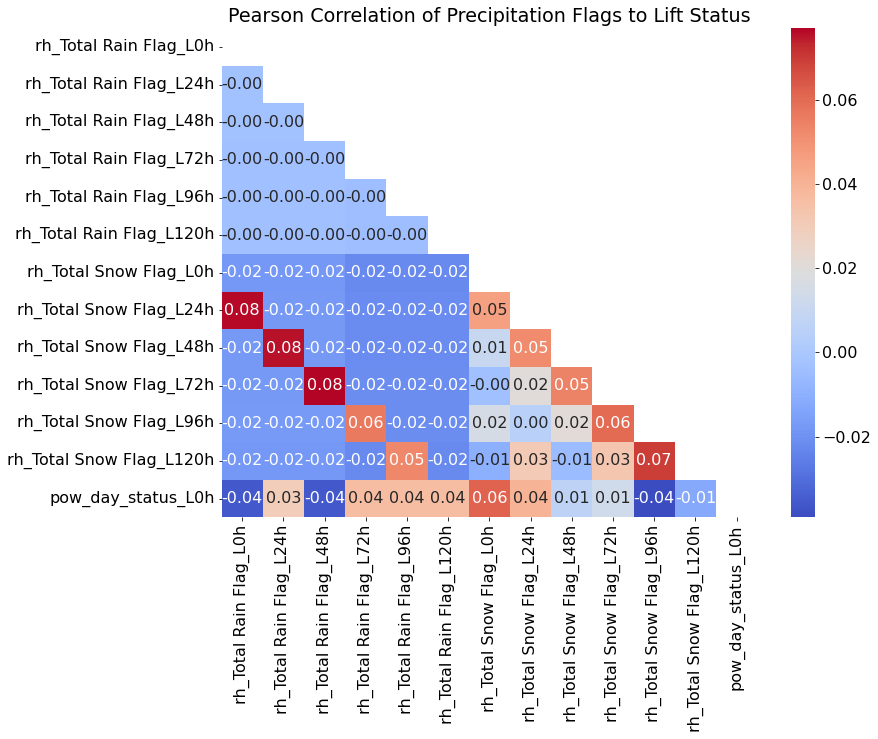

In [49]:
# get only the columns we need
flags_df = peak_df[flag_cols]

# generate mask for upper triangle
mask = np.triu(np.ones_like(flags_df.corr(), dtype = bool))

# plot figure
plt.figure(figsize=(12,9))

# plot data and calculate correlation
sns.heatmap(flags_df.corr(),
            annot = True,
            fmt = ".2f",
            cmap = 'coolwarm',
            mask = mask)

# add title
plt.title('Pearson Correlation of Precipitation Flags to Lift Status')

plt.show()

The pearson correlation coefficients above shows that there is almost a non-existent relationship bewteen the Peak chair lift status and any of the precipitation flags.  We will drop these columns from our data set once we have run our baseline models.

At this point there is certainly more EDA that we can do, but we are going to stop for several reasons.

First, by having determined that we are going to combine the Quillayute and Port Hardy datasets into one, we are removing 40 columns from our data set.  Dropping pressure and height means we will remove another 12.  With those same actions, we are going to recover much of the 30% of data we discarded.  This action alone will probably have a significant impact in improving what ever baseline numbers we generate here.

Second, we are close to the limit of our domain knowledge on what effects each of our features has on the Peak chair status.  We have a series of further intuitions as to how certain features might interact, but our knowldge of exactly how temperature might interact with snowfall to create hazardous avalanche conditions is not strong enough to warrant any more investigation into any one particular set of conditions.

Finally, at this point, we are not even sure if the data we have gathered is going to help us predict the Peak chair status any better than random chance.  Let's move onto some base line modelling with data set as is.  If the results are promising or imply some further EDA is warranted, we will return here and continue.

### Baseline Modelling

At this point, let's run our data through a logistic model to get a baseline for how our relatively raw data predicts Peak chair openings.

In [50]:
# split data in to dependent and independent variables - drop the datetime column
X = peak_df.drop(columns = ['pow_day_status_L0h', 'Date'])
y = peak_df['pow_day_status_L0h']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# fit scaler on train data and transform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# scale test data
X_test_scaled = scaler.transform(X_test)

# fit logistic model and predict
logmod = LogisticRegression()
logmod.fit(X_train_scaled, y_train)
y_pred = logmod.predict(X_test_scaled)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 22  24]
 [ 25 130]]
              precision    recall  f1-score   support

         0.0       0.47      0.48      0.47        46
         1.0       0.84      0.84      0.84       155

    accuracy                           0.76       201
   macro avg       0.66      0.66      0.66       201
weighted avg       0.76      0.76      0.76       201



An overall accuracy of 76% means that we are no better than random guessing at this point, but at least we are no worse!  The precision and recall for predicting the chair is open gives us a little more hope.  Out of all the days the model said the Peak chair would open, it actually opened 85% of the time.  Further, of all the days the peak chair actually opened, the model correctly identified 85% of those days.  Let's try out a decision tree to see if the results are any different.

In [51]:
# fit decision tree and predict - don't worry about using scaled data
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 29  17]
 [ 21 134]]
              precision    recall  f1-score   support

         0.0       0.58      0.63      0.60        46
         1.0       0.89      0.86      0.88       155

    accuracy                           0.81       201
   macro avg       0.73      0.75      0.74       201
weighted avg       0.82      0.81      0.81       201



With a decision tree, our overall accuracy has increased to 81%, and all of our precision and recall scores have also increased.  Looking at the confusion matricies, the decision tree is doing a better job at identifying days that the Peak chair is closed.  Let's try out a KNN classifier here out of interest.

In [52]:
# fit knn model and predict
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 17  29]
 [ 10 145]]
              precision    recall  f1-score   support

         0.0       0.63      0.37      0.47        46
         1.0       0.83      0.94      0.88       155

    accuracy                           0.81       201
   macro avg       0.73      0.65      0.67       201
weighted avg       0.79      0.81      0.79       201



Using an out of the box KNN classifier, our accuracy has remained at 81%.  It appears to be going a great job of identifying days the Peak chair is open out of days it is actually open, but this is coming at the expense of some additional false positives, or saying the chair will open on days that it is not actually open.

Let's try out a Random Forrest to see how it measures up.

In [53]:
# fit random forest model and predict
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 25  21]
 [  8 147]]
              precision    recall  f1-score   support

         0.0       0.76      0.54      0.63        46
         1.0       0.88      0.95      0.91       155

    accuracy                           0.86       201
   macro avg       0.82      0.75      0.77       201
weighted avg       0.85      0.86      0.85       201



From the Random Forest Classifier, again, out of the box, we have managed to increase our scores across the board resulting in a 5 point gain in accuracy leading to an 86% accuracy score.  The struggles still appear to be with correctly classifying closed days as closed days, i.e. we have a large proportion of false positives relative to true negatives.

Finally, let's try an SVM classisier.

In [54]:
# fit svm model and predict
svm = SVC(random_state = 42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# evaluate with confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 21  25]
 [ 10 145]]
              precision    recall  f1-score   support

         0.0       0.68      0.46      0.55        46
         1.0       0.85      0.94      0.89       155

    accuracy                           0.83       201
   macro avg       0.77      0.70      0.72       201
weighted avg       0.81      0.83      0.81       201



With an accuracy score of 83% our SVM model does well, but not as well as our Random Forrest Model.  Further, none of the precision or recall values are better than our current best model, Random Forrest.

Let's take a look at the false positives and true negatives to see if there is anything we can parse out that might help separate them.

In [55]:
# get the predictions from the random forrest classifier again
y_pred = random_forest.predict(X_test)

X_test

,ph_PRES_L0h,ph_PRES_L12h,ph_PRES_L24h,ph_PRES_L36h,ph_PRES_L48h,ph_PRES_L60h,ph_PRES_L72h,ph_PRES_L84h,ph_PRES_L96h,ph_PRES_L108h,...,q_sin_DRCT_L84h,q_cos_DRCT_L84h,q_sin_DRCT_L96h,q_cos_DRCT_L96h,q_sin_DRCT_L108h,q_cos_DRCT_L108h,q_sin_DRCT_L120h,q_cos_DRCT_L120h,q_sin_DRCT_L132h,q_cos_DRCT_L132h
861,695.925000,703.300000,702.625000,708.675000,709.150000,708.850000,709.300000,700.800000,705.800000,707.700000,...,-0.939693,-0.342020,-0.956305,0.292372,-0.597159,-0.802123,0.087156,-0.996195,-0.498320,-0.866993
912,706.000000,708.000000,703.850000,704.950000,706.450000,699.333333,696.300000,707.350000,714.720000,713.350000,...,-0.719340,-0.694658,-0.911762,-0.410719,-0.603804,0.797133,-0.580703,0.814116,-0.255446,0.966823
928,701.720000,692.350000,701.525000,705.850000,703.125000,680.000000,701.825000,705.133333,711.550000,711.750000,...,0.137252,-0.990536,-0.555052,-0.831816,-0.258819,0.965926,-0.680401,-0.732840,-0.275637,0.961262
849,704.325000,695.525000,694.300000,706.250000,710.250000,701.566667,712.100000,713.300000,702.175000,709.150000,...,-0.970296,-0.241922,-0.500000,-0.866025,-0.617951,-0.786217,-0.950283,-0.311387,-0.500000,-0.866025
403,707.640000,699.083333,694.966667,706.225000,710.500000,702.000000,706.400000,697.820000,699.200000,700.933333,...,-0.043619,-0.999048,0.100188,-0.994969,0.121869,-0.992546,0.182236,-0.983255,0.111964,-0.993712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,702.175000,709.150000,706.750000,704.200000,709.575000,706.300000,709.200000,701.033333,714.600000,700.000000,...,-0.469472,-0.882948,0.008727,-0.999962,-0.422618,0.906308,-0.374607,0.927184,-0.426569,0.904455
691,706.975000,705.050000,708.940000,705.066667,712.466667,706.833333,703.300000,714.833333,712.700000,709.533333,...,0.968148,-0.250380,0.907228,-0.420640,0.564007,-0.825770,-0.173648,-0.984808,-0.649448,-0.760406
489,702.975000,699.500000,716.166667,705.380000,704.755556,713.500000,698.500000,697.950000,713.850000,712.466667,...,-0.619583,0.784931,-0.747025,0.664796,-0.849586,0.527450,-0.939693,0.342020,-0.949972,0.312335
306,693.500000,697.200000,701.300000,695.700000,708.750000,696.180000,693.175000,705.662500,708.242857,701.687500,...,-0.995396,0.095846,-0.815801,0.578332,0.532032,0.846724,0.999048,0.043619,0.984808,0.173648


### Conclusions

We feel that the above model scores show that there is a good chance that predicting if the Peak chair will open or not is a solveable problem with realitvely high accuracy.  The gap in accuracy between always stating the Peak chair will be open and a perfect score has been closed by over 40% by the out-of-the-box models we have tried so far.  From the perspective of recall, or ensuring we are saying the Peak chair is open when it is in fact open, we have covered 75% of the ground from Peak chair is always open to a perfect prediction.  The models are lagging behind in the sense they are giving too many false positives, or telling you the chair will open when it in fact will not.

Combining the above along with the opportunities for feature engineering identified in the EDA process above, we are confident we can improve the accuracy of our predictions further.  How much, we are not sure, but we feel that if we can achieve a 95% accuracy score or better, then that would be justification for building a production model that uses forecast data as opposed to historical data for the day of features.

The last thing to do before concluding this report is to save the results of each model into a csv file to be used for comparison against future models.

In [56]:
# run each models prediction again and save result of confusion matrix to a dataframe
scores = []

# logistic
y_pred = logmod.predict(X_test_scaled)
scores.append(np.ravel(confusion_matrix(y_test, y_pred)))

# decision tree
y_pred = tree.predict(X_test)
scores.append(np.ravel(confusion_matrix(y_test, y_pred)))

# knn
y_pred = knn.predict(X_test_scaled)
scores.append(np.ravel(confusion_matrix(y_test, y_pred)))

# random forest
y_pred = random_forest.predict(X_test)
scores.append(np.ravel(confusion_matrix(y_test, y_pred)))

# svm
y_pred = svm.predict(X_test_scaled)
scores.append(np.ravel(confusion_matrix(y_test, y_pred)))

# put all into a data frame
scores_df = pd.DataFrame(data = scores,
                         index = ['Base_Line_Logistic',
                                  'Base_Line_Tree',
                                  'Base_Line_KNN',
                                  'Base_Line_Forest',
                                  'Base_Line_SVM'],
                         columns = ['True Negative',
                                    'False Positive',
                                    'False Negative',
                                    'True Positive'])

In [57]:
# confirm it has worked
scores_df

,True Negative,False Positive,False Negative,True Positive
Base_Line_Logistic,22,24,25,130
Base_Line_Tree,29,17,21,134
Base_Line_KNN,17,29,10,145
Base_Line_Forest,25,21,8,147
Base_Line_SVM,21,25,10,145


In [58]:
# export to csv
scores_df.to_csv('./Data/BaseLineModelScores.csv')